애플의 시계열 주가 데이터를 학습하고 예측하는 문제입니다. 

apple_stock.csv  파일에   종가(close) 를  10일단위로 학습하고  

5일치 애플 주식의 종가(close) 데이터가 입력되면 그 다음 5일치 애플 주식의 종가(close)를 예측하는 프로그램을 작성하세요.   

Sequence to Sequence   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple_df = pd.read_csv('apple_stock.csv', index_col='Date')
apple_df.index = pd.to_datetime(apple_df.index)
apple = apple_df['Close']

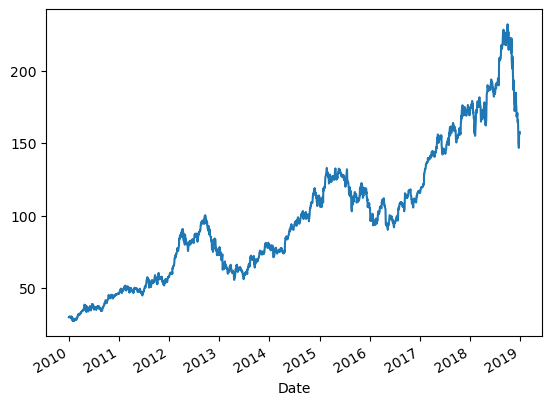

In [2]:
apple.plot()
apple = apple.iloc[:-5]

In [3]:
a = np.array(apple)
a = a.reshape(-1 ,1)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()   

aa = scaler.fit_transform(a)

In [4]:
aa = aa.reshape(-1, 10, 1)

In [6]:
X_train = aa[:, 0:5]
X_train = X_train.reshape(-1,5,1)
Y_train = aa[:, 5:10]
Y_train = Y_train.reshape(-1,5)

In [7]:
print(X_train.shape, Y_train.shape)

(226, 5, 1) (226, 5)


In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from keras.layers import TimeDistributed

def make_model():
    model = Sequential()
    model.add(SimpleRNN(15, return_sequences=True, input_shape=(5,1)))
    model.add(TimeDistributed(Dense(1, activation='linear')))
    model.compile(loss='mse', optimizer='sgd')
    return model

In [9]:
model = make_model()
history = model.fit(X_train, Y_train, epochs=500, validation_split=0.2, verbose=0)

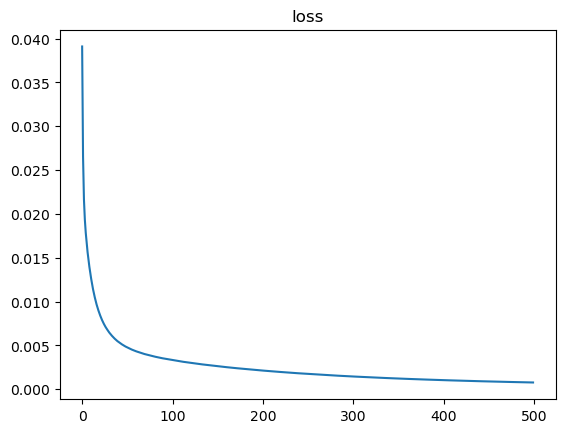

In [10]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

1/1 [==============================] - 0s 17ms/step


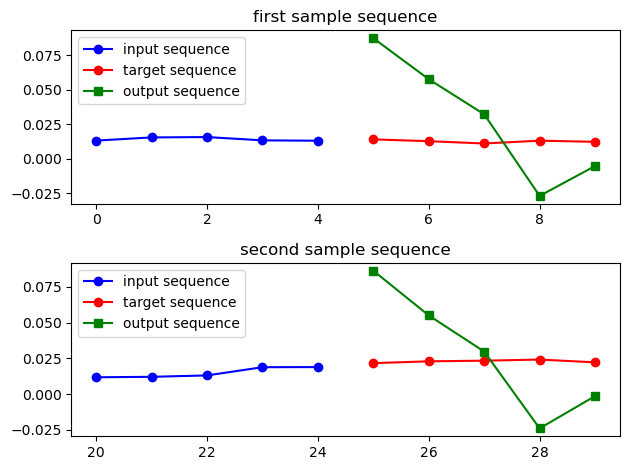

In [14]:
plt.subplot(211)
plt.plot([0,1,2,3,4], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7, 8, 9], Y_train[0].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7, 8, 9],model.predict(X_train[0:1, : , :]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.title("first sample sequence")

plt.subplot(212)
plt.plot([20,21, 22,23, 24], X_train[4].flatten(), 'bo-', label="input sequence")
plt.plot([25,26,27,28,29], Y_train[4].flatten(), 'ro-', label="target sequence")
plt.plot([25,26,27,28,29],model.predict(X_train[4:5, : , :]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.title("second sample sequence")
plt.tight_layout()
plt.show()

In [12]:
y_predict = model.predict(aa[0, 0:5, 0].reshape(-1,5,1))
realData = scaler.inverse_transform(aa[0,0:5,0].reshape(-1,5))
y_predict = scaler.inverse_transform(y_predict.reshape(-1,5))
print(realData, '\n----\n' ,y_predict)

1/1 [==============================] - 0s 27ms/step
[[30.10428619 30.5728569  30.62571335 30.13857079 30.08285713]] 
----
 [[45.28807  39.207787 34.004684 21.900335 26.32803 ]]
